In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

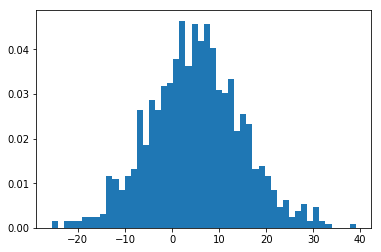

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(True)

CMA on 32 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=951916, Sat Nov  4 21:55:57 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.772327213865553e+04 1.0e+00 1.79e-01  2e-01  2e-01 0:00.1
    2     16 1.382742721036330e+04 1.1e+00 1.66e-01  1e-01  2e-01 0:00.4
    3     24 1.201140706059986e+04 1.2e+00 1.46e-01  1e-01  1e-01 0:00.6
   19    152 5.443833569166221e+03 3.1e+00 5.18e-02  3e-02  5e-02 0:03.6
   41    328 3.745305666879654e+03 1.3e+01 3.56e-02  1e-02  4e-02 0:07.9
   69    552 3.701110444328372e+03 4.0e+01 2.23e-02  6e-03  2e-02 0:13.1
  100    800 3.699988887513934e+03 9.5e+01 1.90e-03  3e-04  1e-03 0:18.7
  135   1080 3.699987416301851e+03 4.1e+02 4.01e-05  2e-06  2e-05 0:25.2
CMAEvolutionStrategyResult(xbest=array([-7.21508585e-07, -1.36317675e-01, -2.22134665e-01,  9.60024376e-02,
        5.76700775e-01]), fbest=3699.9874162523579, evals_best=1039, evaluations=1080, iterations=135, xfavorite=array([-1.01880408e-06, -1.363140

## Testing output

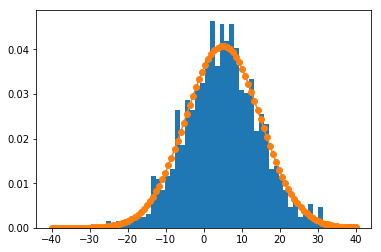

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

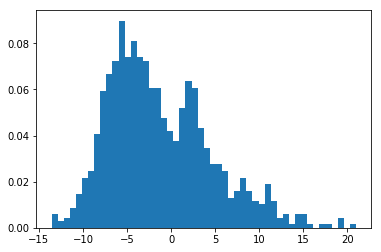

In [7]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [12]:
a = RTBM(1,2)

In [14]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [15]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=919198, Sat Nov  4 21:57:46 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.574771321621067e+03 1.0e+00 1.95e-01  2e-01  2e-01 0:00.0
    2     20 3.913975651761645e+03 1.2e+00 2.03e-01  2e-01  2e-01 0:00.4
    3     30 5.589292875547153e+03 1.3e+00 2.23e-01  2e-01  2e-01 0:00.6
   17    170 4.237931048235881e+03 3.0e+00 2.09e-01  2e-01  3e-01 0:03.7
   35    350 3.230904891578436e+03 4.8e+00 1.64e-01  1e-01  2e-01 0:07.8
   57    570 3.189833741625780e+03 8.4e+00 6.81e-02  5e-02  9e-02 0:12.9
   82    820 3.182168397689617e+03 1.7e+01 4.35e-02  3e-02  5e-02 0:19.2
  100   1000 3.181115384073464e+03 3.3e+01 2.60e-02  1e-02  4e-02 0:23.5
  133   1330 3.180569763223158e+03 9.3e+01 1.00e-02  2e-03  1e-02 0:31.5
  170   1700 3.180569366766613e+03 3.2e+02 5.81e-03  7e-04  1e-02 0:40.7
  200   2000 3.180569005883286e+03 7.0e+02 2.39e-03  2e-04  4e-03 0:48.3
  244   2440 3.180568906701051e+03

KeyboardInterrupt: 

## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')